In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [12]:
linewidth = 3
colors = ['#CC0000', '#0066CC']

In [13]:
def ddm_sim(v, a, t_0):
    n_steps = 0
    x = a * 0.5
    dt = 0.001
    max_steps = 10000  # Maximum RT == 10 seconds
    x_history = [x]
    sigma = 1.0 

    while (x > 0 and x < a and n_steps < max_steps):
        noise = np.random.normal(loc=0, scale=sigma)
        x += v * dt + np.sqrt(dt) * noise
        x_history.append(x)
        n_steps += 1

    if x >= a:
        x_history[-1] = a
    elif x <= 0:
        x_history[-1] = 0

    rt = n_steps * dt
    out = rt + t_0 if x > 0 else -rt - t_0

    return out, x_history

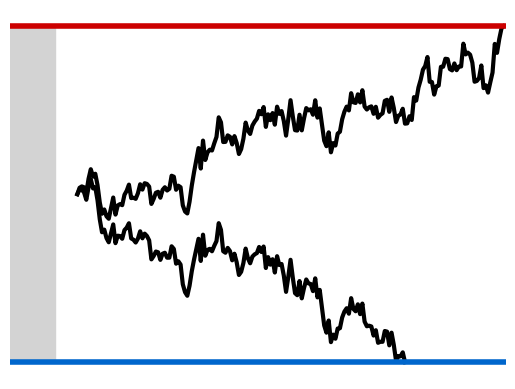

In [18]:
# DDM plot

# Find nicest seed 
# try:
#     seed 
# except NameError:
#     seed = 0 
# seed += 1
# print(f"Using seed: {seed}")

# Plot (uses heuristic t_0 to have same shaded area for both random walks)
seed = 221
np.random.seed(seed)
_, ddm_trial2 = ddm_sim(v=2.5, a=1.0, t_0=0.5)
np.random.seed(seed)
_, ddm_trial = ddm_sim(v=-2.5, a=1.0, t_0=0.5)

fig, ax = plt.subplots()
ax.plot(ddm_trial2, color='black', lw=linewidth)
ax.plot(ddm_trial, color='black', lw=linewidth)
ax.axhline(1.0, color=colors[0], lw=linewidth+1)
ax.axhline(0.0, color=colors[1], lw=linewidth+1)
ax.set_xlim(-30, max(len(ddm_trial2), len(ddm_trial)))
for spine in ax.spines.values():
    spine.set_visible(False)
ax.axvspan(-30, -10, 0.05, 0.95, color='lightgray')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('plots/ddm_trials.pdf', dpi=300, bbox_inches='tight')

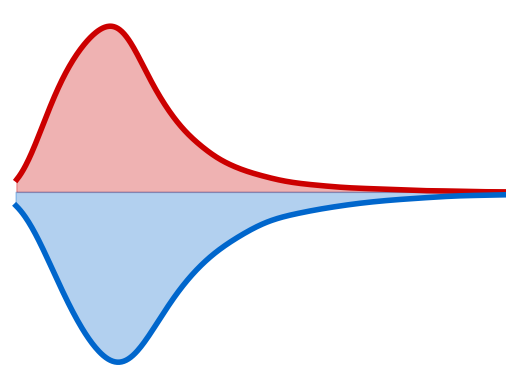

In [6]:
# RT dists plot

# Get RT distributions
n_trials = 50000
ddm_rts_correct = []
ddm_rts_incorrect = []
v_bounds = [(0.25, 2.5), (1, 3.5)]
a_bounds = [(0.5, 1), (0.5, 1.5)]  

for i in range(2):
    v_samples = np.random.uniform(v_bounds[i][0], v_bounds[i][1], n_trials)
    a_samples = np.random.uniform(a_bounds[i][0], a_bounds[i][1], n_trials)
    t0_samples = np.random.uniform(0, 0.2, n_trials)
    ddm_rts = np.array([
        ddm_sim(v=v, a=a, t_0=t0)[0]
        for v, a, t0 in zip(v_samples, a_samples, t0_samples)
    ])

    ddm_rts_correct.append(ddm_rts[ddm_rts > 0])
    ddm_rts_incorrect.append(-ddm_rts[ddm_rts < 0])


# Plot
fig, ax = plt.subplots()

for i in range(2):
    # Compute KDEs
    bw_factor = 0.2
    rts_correct = ddm_rts_correct[i]
    rts_incorrect = ddm_rts_incorrect[i]
    kde_correct = gaussian_kde(rts_correct, bw_method=bw_factor)
    kde_incorrect = gaussian_kde(rts_incorrect, bw_method=bw_factor)
    x_correct = np.linspace(rts_correct.min(), rts_correct.max(), 1000)
    x_incorrect = np.linspace(rts_incorrect.min(), rts_incorrect.max(), 1000)

    # Scale by relative frequencies
    frac_correct = len(rts_correct) / len(ddm_rts)
    frac_incorrect = len(rts_incorrect) / len(ddm_rts)
    y_correct = kde_correct(x_correct) * frac_correct
    y_incorrect = kde_incorrect(x_incorrect) * frac_incorrect
    if i == 1:
        y_correct = -y_correct
        y_incorrect = -y_incorrect

    # Plot mirrored KDEs for correct (red) and incorrect (blue)
    for x, y, ls in [
        (x_correct, y_correct, '-'),
        #(x_incorrect, y_incorrect, '--'),
    ]:
        ax.fill_between(x, y, color=colors[i], alpha=0.3)
        ax.plot(x, y, color=colors[i], lw=linewidth, linestyle=ls)

ax.axhline(0.0, color='black', lw=linewidth)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)
ax.set_ylabel('')
plt.savefig('plots/ddm_rts.pdf', dpi=300, bbox_inches='tight')

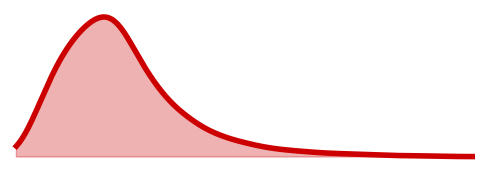

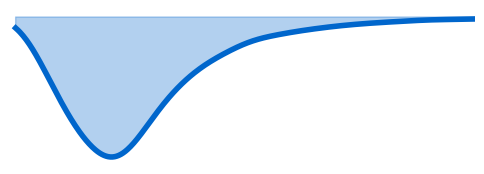

In [9]:
# Plot
for i in range(2):
    fig, ax = plt.subplots(figsize=(6, 2))
    # Compute KDEs
    bw_factor = 0.2
    rts_correct = ddm_rts_correct[i]
    rts_incorrect = ddm_rts_incorrect[i]
    kde_correct = gaussian_kde(rts_correct, bw_method=bw_factor)
    kde_incorrect = gaussian_kde(rts_incorrect, bw_method=bw_factor)
    x_correct = np.linspace(rts_correct.min(), rts_correct.max(), 1000)
    x_incorrect = np.linspace(rts_incorrect.min(), rts_incorrect.max(), 1000)

    # Scale by relative frequencies
    frac_correct = len(rts_correct) / len(ddm_rts)
    frac_incorrect = len(rts_incorrect) / len(ddm_rts)
    y_correct = kde_correct(x_correct) * frac_correct
    y_incorrect = kde_incorrect(x_incorrect) * frac_incorrect
    if i == 1:
        y_correct = -y_correct
        y_incorrect = -y_incorrect

    # Plot mirrored KDEs for correct (red) and incorrect (blue)
    for x, y, ls in [
        (x_correct, y_correct, '-'),
        #(x_incorrect, y_incorrect, '--'),
    ]:
        ax.fill_between(x, y, color=colors[i], alpha=0.3)
        ax.plot(x, y, color=colors[i], lw=linewidth, linestyle=ls)

    #ax.axhline(0.0, color='black', lw=linewidth)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylabel('')
    plt.savefig(f'plots/ddm_rts_{i}.pdf', dpi=300, bbox_inches='tight', transparent=True)